# Introduction

<img src="https://i.imgur.com/gugIA5r.png" width=700>

### Introduction

Dr Ignaz Semmelweis was a Hungarian physician born in 1818 who worked in the Vienna General Hospital. In the past people thought of illness as caused by "bad air" or evil spirits. But in the 1800s Doctors started looking more at anatomy, doing autopsies and started making arguments based on data. Dr Semmelweis suspected that something was going wrong with the procedures at Vienna General Hospital. Semmelweis wanted to figure out why so many women in maternity wards were dying from childbed fever (i.e., [puerperal fever](https://en.wikipedia.org/wiki/Postpartum_infections)).

Today, we embark on the same path as Dr. Semmelweis, delving into the analysis of data collected from 1841 to 1849.

### The Data Source

Dr. Semmelweis published his research in 1861. The scanned pages of the full text with the original tables in [German](http://www.deutschestextarchiv.de/book/show/semmelweis_kindbettfieber_1861) are available, along with an excellent [English translation for reference](http://graphics8.nytimes.com/images/blogs/freakonomics/pdf/the%20etiology,%20concept%20and%20prophylaxis%20of%20childbed%20fever.pdf)

<img src=https://i.imgur.com/6HfLtaC.png width=500>

### Import Statements

In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from scipy import stats

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

# Create locators for ticks on the time axis
years=mdates.YearLocator()
months=mdates.MonthLocator()
year_format=mdates.DateFormatter('%Y')

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

### Read the Data

In [3]:
df_yearly = pd.read_csv('annual_deaths_by_clinic.csv')
# parse_dates avoids DateTime conversion later
df_monthly = pd.read_csv('monthly_deaths.csv', 
                      parse_dates=['date'])

# Preliminary Data Exploration

In [4]:
df_yearly.head()

,year,births,deaths,clinic
0,1841,3036,237,clinic 1
1,1842,3287,518,clinic 1
2,1843,3060,274,clinic 1
3,1844,3157,260,clinic 1
4,1845,3492,241,clinic 1


In [5]:
df_yearly.tail()

,year,births,deaths,clinic
7,1842,2659,202,clinic 2
8,1843,2739,164,clinic 2
9,1844,2956,68,clinic 2
10,1845,3241,66,clinic 2
11,1846,3754,105,clinic 2


In [6]:
df_yearly.shape

(12, 4)

In [7]:
df_yearly.year.unique()

array([1841, 1842, 1843, 1844, 1845, 1846])

In [8]:
df_monthly.head()

,date,births,deaths
0,1841-01-01,254,37
1,1841-02-01,239,18
2,1841-03-01,277,12
3,1841-04-01,255,4
4,1841-05-01,255,2


In [9]:
df_monthly.tail()

,date,births,deaths
93,1848-11-01,310,9
94,1848-12-01,373,5
95,1849-01-01,403,9
96,1849-02-01,389,12
97,1849-03-01,406,20


In [10]:
df_monthly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98 entries, 0 to 97
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    98 non-null     datetime64[ns]
 1   births  98 non-null     int64         
 2   deaths  98 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 2.4 KB


In [11]:
df_yearly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   year    12 non-null     int64 
 1   births  12 non-null     int64 
 2   deaths  12 non-null     int64 
 3   clinic  12 non-null     object
dtypes: int64(3), object(1)
memory usage: 512.0+ bytes


In [12]:
df_monthly.shape

(98, 3)

### Check for Nan Values and Duplicates

In [13]:
df_monthly.duplicated().sum()

0

In [14]:
df_monthly.isna().sum()

date      0
births    0
deaths    0
dtype: int64

In [15]:
df_yearly.duplicated().sum()

0

In [16]:
df_yearly.isna().sum()

year      0
births    0
deaths    0
clinic    0
dtype: int64

### Descriptive Statistics

In [17]:
df_monthly.describe()

,births,deaths
count,98.00,98.00
mean,267.00,22.47
std,41.77,18.14
min,190.00,0.00
25%,242.50,8.00
50%,264.00,16.50
75%,292.75,36.75
max,406.00,75.00


In [18]:
df_yearly.describe()

,year,births,deaths
count,12.00,12.00,12.00
mean,"1,843.50","3,152.75",223.33
std,1.78,449.08,145.38
min,"1,841.00","2,442.00",66.00
25%,"1,842.00","2,901.75",100.25
50%,"1,843.50","3,108.50",219.50
75%,"1,845.00","3,338.25",263.50
max,"1,846.00","4,010.00",518.00


### Percentage of Women Dying in Childbirth

How dangerous was childbirth in the 1840s in Vienna? 

* Using the annual data, the percentage of women giving birth who died throughout the 1840s at the hospital was found out.


In comparison, the United States recorded 18.5 maternal deaths per 100,000 or 0.018% in 2013 [(source).](
https://en.wikipedia.org/wiki/Maternal_death#:~:text=The%20US%20has%20the%20%22highest,17.8%20per%20100%2C000%20in%202009)

In [19]:
yr_df = df_yearly.groupby(by='year').agg({'births':pd.Series.sum,'deaths':pd.Series.sum})
yr_df['death_perc'] = (yr_df.deaths/yr_df.births)*100
yr_df

,births,deaths,death_perc
year,,,
1841,5478,323,5.90
1842,5946,720,12.11
1843,5799,438,7.55
1844,6113,328,5.37
1845,6733,307,4.56
1846,7764,564,7.26


In [20]:
yr_df.death_perc.mean()

7.12464373633183

In [21]:
m_df = df_monthly.groupby(by=df_monthly.date.dt.year).agg({'births':pd.Series.sum,'deaths':pd.Series.sum})
m_df['death_perc'] = (m_df.deaths/m_df.births)*100
m_df

,births,deaths,death_perc
date,,,
1841,2576,185,7.18
1842,3067,521,16.99
1843,2871,274,9.54
1844,2918,260,8.91
1845,3253,241,7.41
1846,3352,459,13.69
1847,3375,176,5.21
1848,3556,45,1.27
1849,1198,41,3.42


In [22]:
m_df.death_perc.mean()

8.18082245610681

# Total Number of Births and Deaths over Time

## Monthly Data on Twin Axes

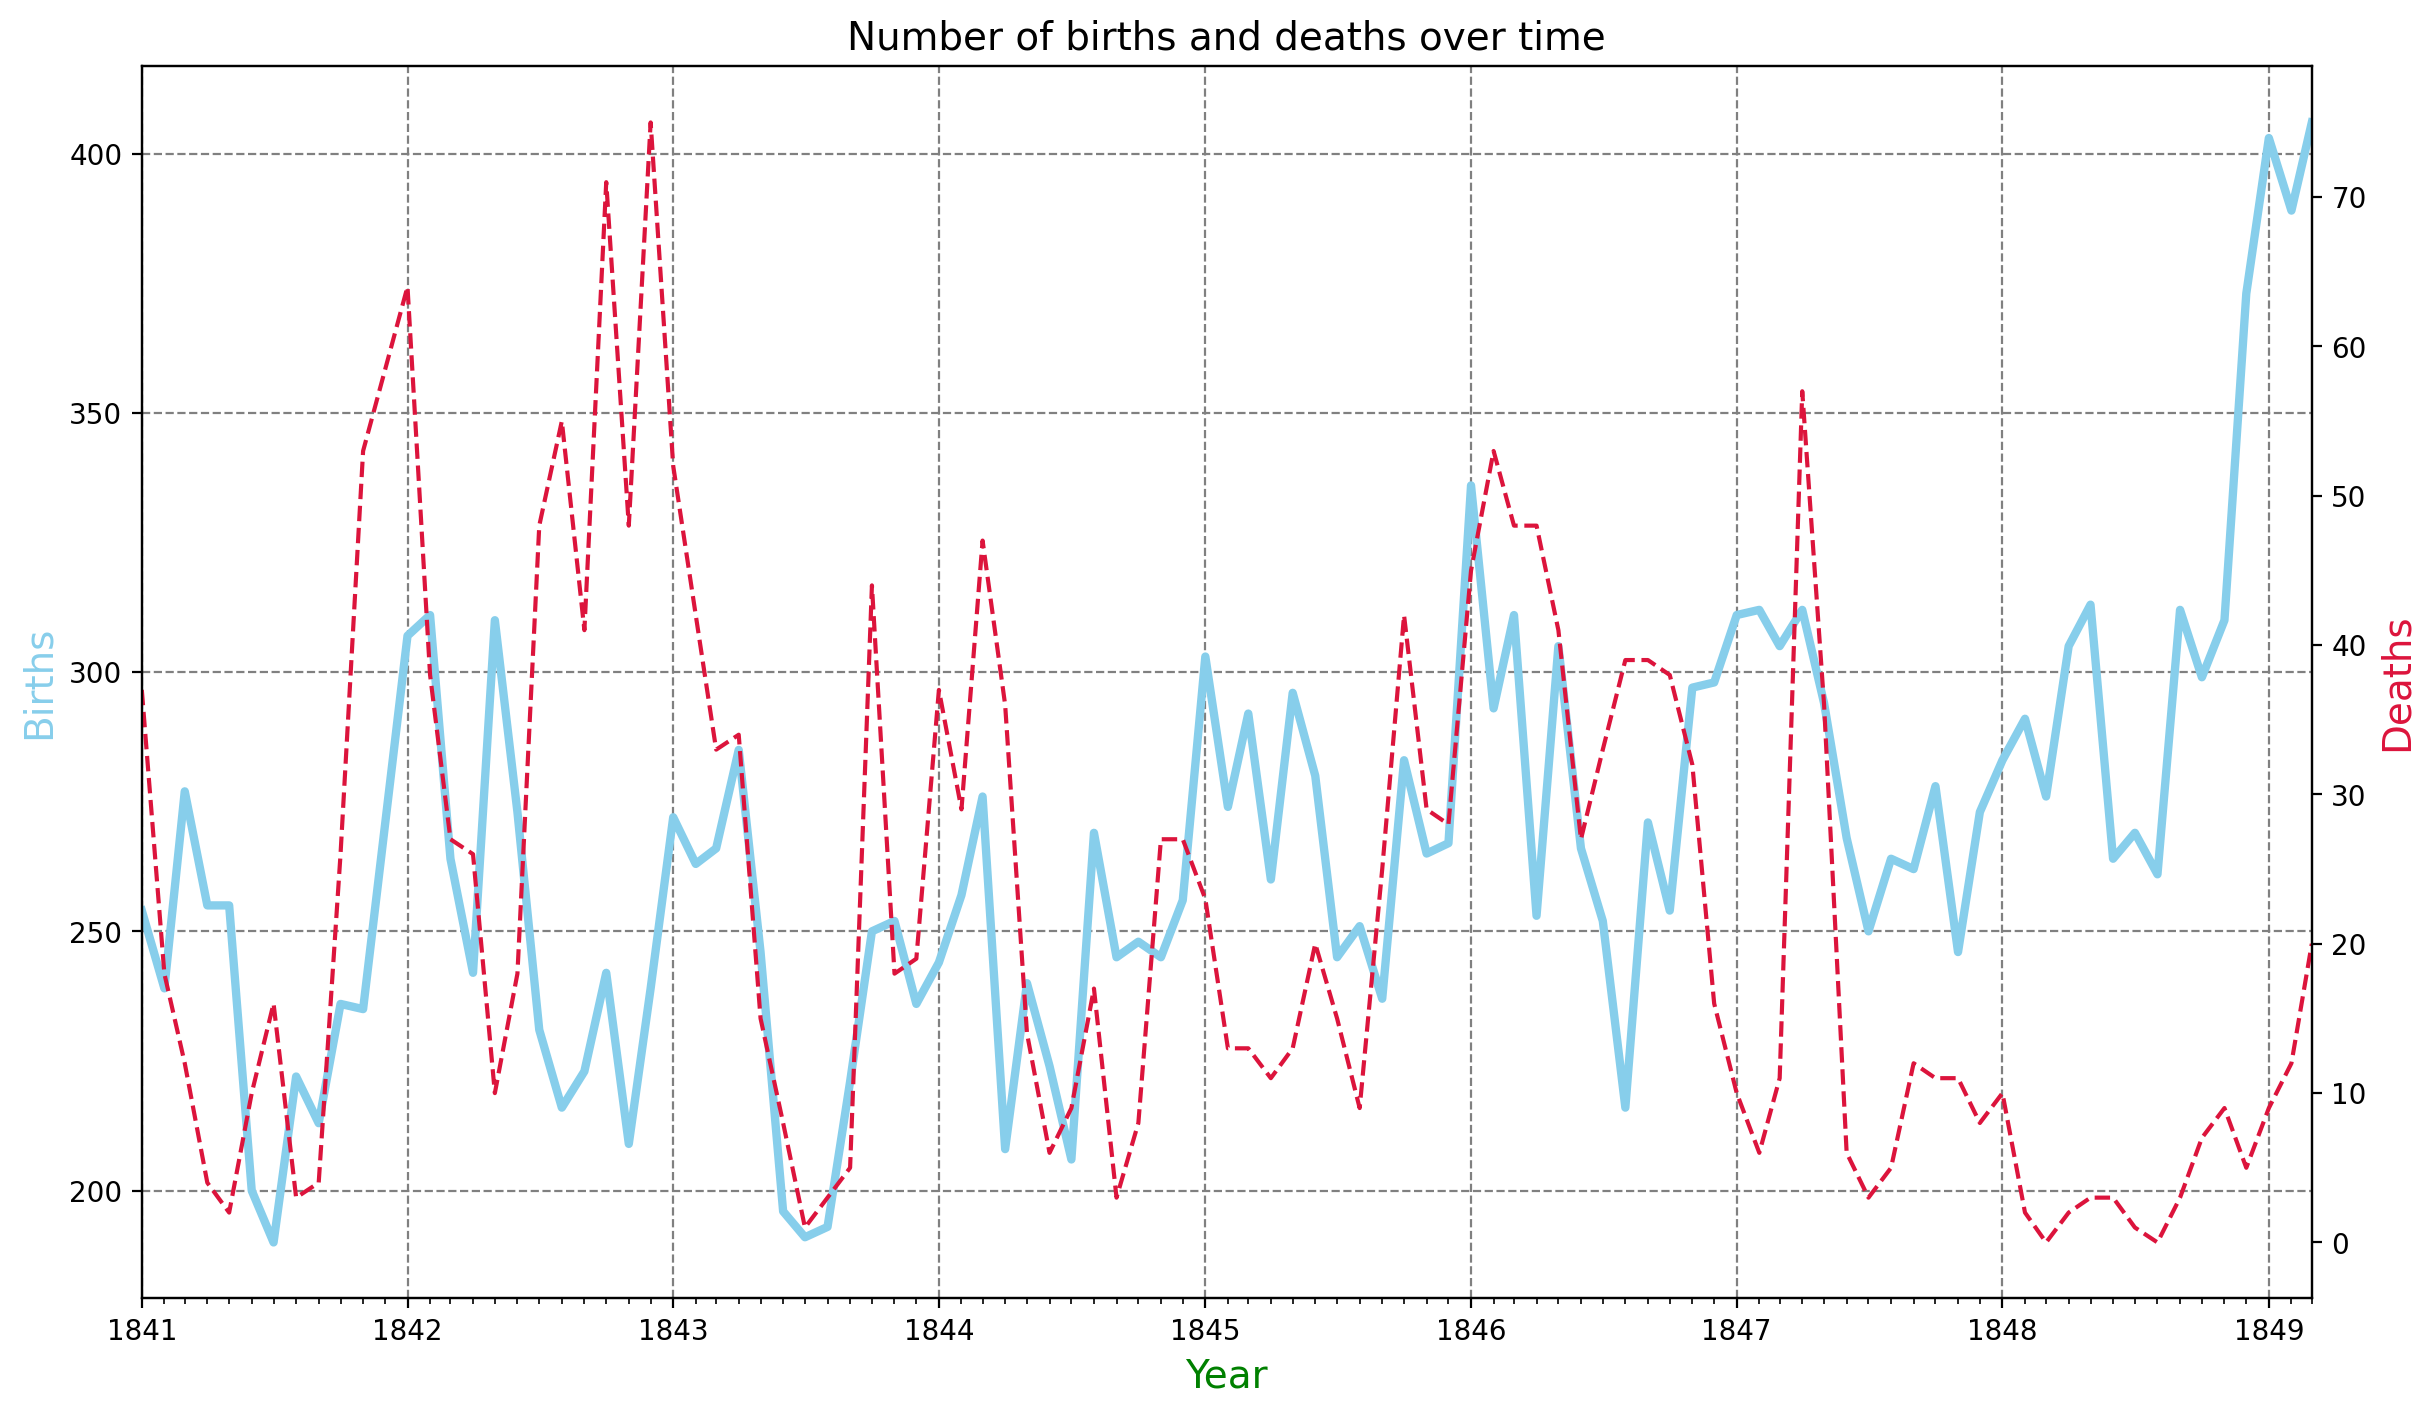

In [23]:
fig = plt.figure(figsize=(14,8),dpi=200)
plt.title('Number of births and deaths over time',fontsize=14)
ax1=plt.gca()
ax1.grid(color='grey',linestyle='--')
ax2=ax1.twinx()
ax1.set_xlim([df_monthly.date.min(),df_monthly.date.max()])
ax1.plot(df_monthly.date,df_monthly.births,color='skyblue',linewidth=3)
ax1.set_xlabel('Year',fontsize=14,color='green')
ax1.set_ylabel('Births',color='skyblue',fontsize=14)
ax2.set_ylabel('Deaths',color='crimson',fontsize=14)
ax2.plot(df_monthly.date,df_monthly.deaths,color='crimson',linewidth=1.5,linestyle='--')
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)

# The Yearly Data Split by Clinic

line charts of the births and deaths of the two different clinics at the Vienna General Hospital.

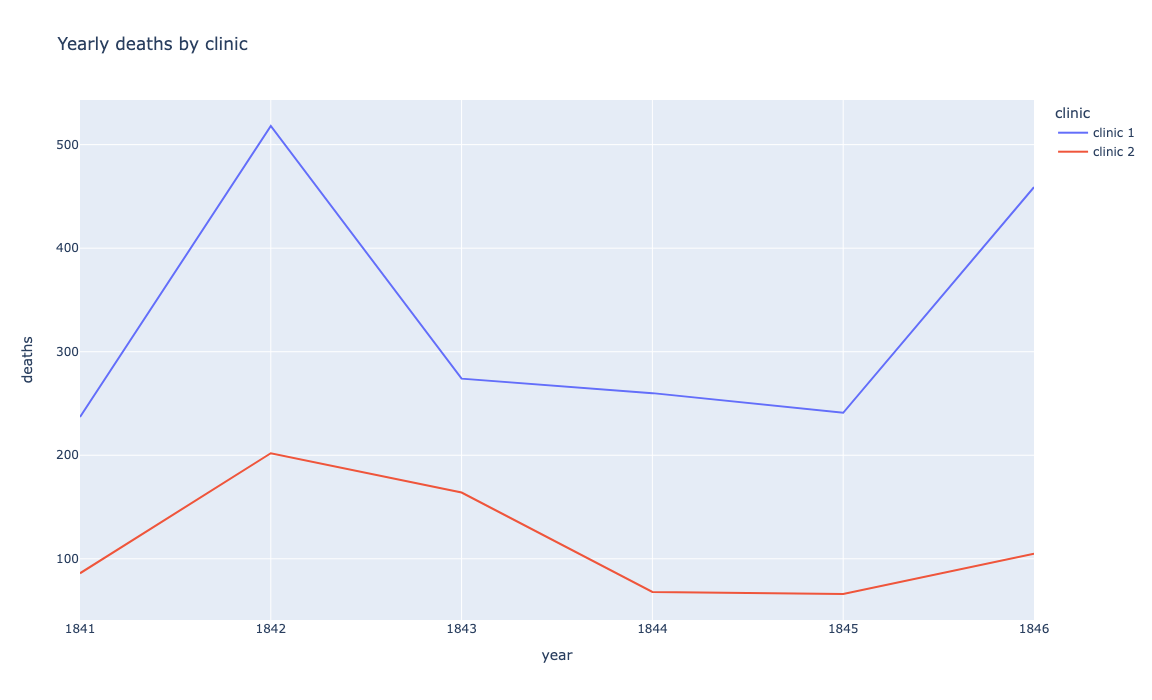

In [32]:
px.line(data_frame=df_yearly,x='year',y='deaths',color='clinic',title='Yearly deaths by clinic',height=700, width=1000)

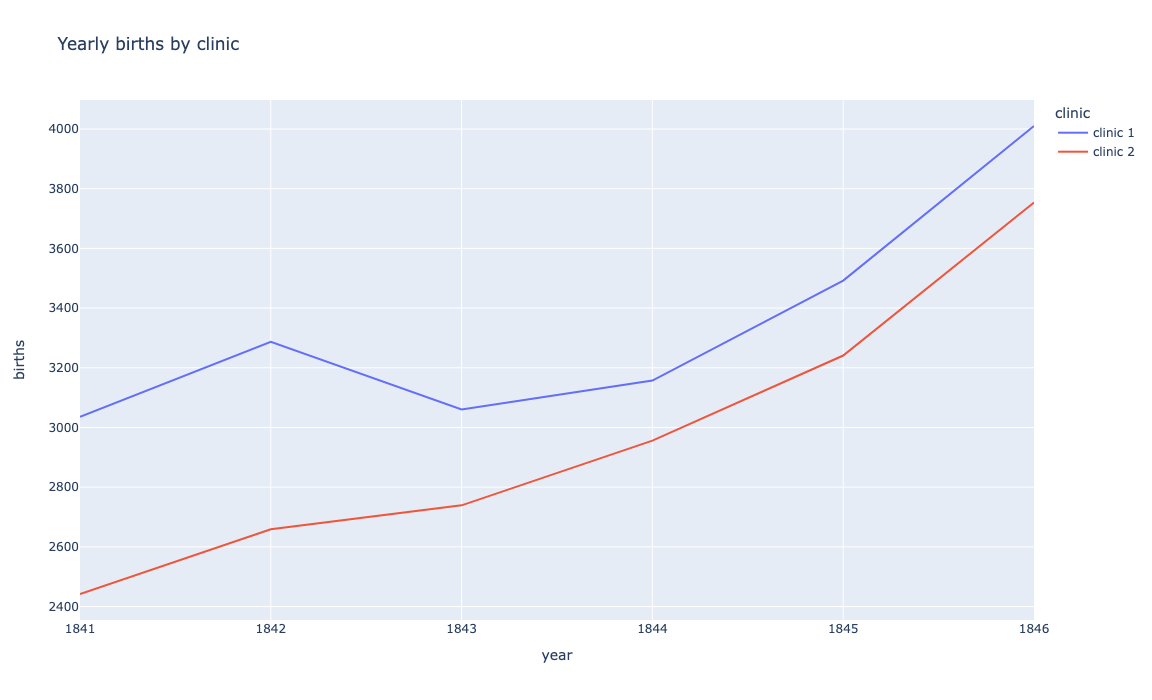

In [31]:
px.line(data_frame=df_yearly,x='year',y='births',color='clinic',title='Yearly births by clinic',height=700,width=1000)

### Calculate the Proportion of Deaths at Each Clinic

#### Proportion of maternal deaths per clinic

In [26]:
clinic_1_df = df_yearly[df_yearly.clinic=='clinic 1']
(clinic_1_df.deaths.sum()/clinic_1_df.births.sum())*100

9.924159265542361

In [27]:
clinic_2_df = df_yearly[df_yearly.clinic=='clinic 2']
(clinic_2_df.deaths.sum()/clinic_2_df.births.sum())*100

3.8839862852003826

In [35]:
yr_df['death_perc'] = (yr_df.deaths/yr_df.births)*100
yr_df

,births,deaths,death_perc
year,,,
1841,5478,323,5.90
1842,5946,720,12.11
1843,5799,438,7.55
1844,6113,328,5.37
1845,6733,307,4.56
1846,7764,564,7.26


### Plotting the Proportion of Yearly Deaths by Clinic

In [ ]:
px.line(data_frame=yr_df_clinic,x='year',y='death_perc',color='clinic',title='Proportion of Yearly Deaths by Clinic',height=500)

# The Effect of Handwashing

Dr Semmelweis made handwashing obligatory in the summer of 1947. In fact, he ordered people to wash their hands with clorine (instead of water).

In [ ]:
# Date when handwashing was made mandatory
handwashing_start = pd.to_datetime('1847-06-01')

**Challenge**: 
* Add a column called "pct_deaths" to `df_monthly` that has the percentage of deaths per birth for each row. 
* Create two subsets from the `df_monthly` data: before and after Dr Semmelweis ordered washing hand.
* Calculate the average death rate prior to June 1947.
* Calculate the average death rate after June 1947.

In [ ]:
df_monthly['death_perc'] = df_monthly.deaths*100/df_monthly.births
df_monthly.head()

In [ ]:
df_before_hw = df_monthly[df_monthly.date < handwashing_start]
df_after_hw = df_monthly[df_monthly.date >= handwashing_start]

In [ ]:
df_before_hw.death_perc.mean()

In [ ]:
df_after_hw.death_perc.mean()

### Rolling Average of the Death Rate

##### 6 month rolling average death rate prior to mandatory handwashing.

In [ ]:
roll_df = df_before_hw.set_index('date')
roll_df = roll_df.rolling(window=6).mean()

In [ ]:
roll_df

### Monthly death rates before and after handwashing practice changes


In [ ]:
fig = plt.figure(figsize=(14,8),dpi=200)
plt.title('Death rates before and after handwashing practice change',fontsize=14)
ax1=plt.gca()
ax1.grid(color='grey',linestyle='--')
ax1.set_xlim([df_monthly.date.min(),df_monthly.date.max()])
bh, = ax1.plot(df_before_hw.date,df_before_hw.death_perc,color='grey',linewidth=1,linestyle='--',label='Before Handwash')
ma, = ax1.plot(roll_df.index,roll_df.death_perc,color='red',linewidth=3,label='6m Moving Average of Death Rate',linestyle='--')
ax1.set_xlabel('Year',fontsize=14,color='green')
ax1.set_ylabel('Death rates',color='black',fontsize=14)
ah, = ax1.plot(df_after_hw.date,df_after_hw.death_perc,color='skyblue',linewidth=2,label='After Handwash',marker='o')
ax1.legend(handles=[bh,ma,ah])
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_format)
ax1.xaxis.set_minor_locator(months)

### Calculating the Difference in the Average Monthly Death Rate

* Average percentage of monthly deaths before handwashing 
* Average percentage of monthly deaths after handwashing was made obligatory
* By how much did handwashing reduce the average chance of dying in childbirth in percentage terms?
* Comparing the numbers to the average for all the 1840s that we calculated earlier.
* How many times lower are the chances of dying after handwashing compared to before?

In [ ]:
print(f'average percentage of monthly deaths before handwashing:{df_before_hw.death_perc.mean()}')

In [ ]:
print(f'average percentage of monthly deaths after handwashing was made obligatory:{df_after_hw.death_perc.mean()}')


In [ ]:
print(f'how much did handwashing reduce the average chance of dying in childbirth in percentage terms:{df_before_hw.death_perc.mean()-df_after_hw.death_perc.mean()}')


In [ ]:
print(f'How do these numbers compare to the average for all the 1840s that we calculated earlier?:{(df_monthly.deaths.sum()/df_monthly.births.sum())*100}')


In [ ]:
print(f'How many times lower are the chances of dying after handwashing compared to before?:{df_before_hw.death_perc.mean()/df_after_hw.death_perc.mean()}')


### Using Box Plots to Show How the Death Rate Changed Before and After Handwashing

In [ ]:
df_monthly['handwash'] = np.where(df_monthly.date<handwashing_start,'yes','no')

In [ ]:
df_monthly.drop('before/after hw',axis=1,inplace=True)

In [ ]:
df_monthly.tail()

In [ ]:
px.box(df_monthly,x='handwash',y='death_perc',color='handwash',height=500,title='Impact of handwashing in death rates')

### Using Histograms to Visualise the Monthly Distribution of Outcomes



In [ ]:
px.histogram(df_monthly,x='death_perc',color='handwash',nbins=30,opacity=0.6,
                   barmode='overlay',
                   marginal='box',height=700,histnorm='percent')

### Using a Kernel Density Estimate (KDE) to visualise a smooth distribution


In [ ]:
sns.kdeplot(df_before_hw,x='death_perc',clip=(0,100),fill=True)
sns.kdeplot(df_after_hw,x='death_perc',clip=(0,100),fill=True)
plt.xlim(0,50)

### Using a T-Test to Show Statistical Significance

Determining if the differences in the means are statistically significant or purely due to chance. 

If the p-value is less than 1% then we can be 99% certain that handwashing has made a difference to the average monthly death rate. 


In [ ]:
stats.ttest_ind(df_before_hw.death_perc,df_after_hw.death_perc)

## p-value is less than 0.05 which indicates that it's not a chance event.